In [1]:
import numpy as np

#Objeto inicial
coord = [[0,0], [1,0], [1,1],[0,1]]
coord.append(coord[0]) #repete a primeira coordenada
A=np.array(coord)
xs, ys = zip(*A) #cria uma lista com os valores de x e y

#Gradiente de deformações
f = [[1.3,-0.375],[0.75,0.65]]
F=np.array(f)

#for i in range(len(coord)):
#  print(np.dot(coord[i],F))

#Matriz de deformação direita
U2 = np.dot(F.T,F)
U2 = np.round(U2,2)
U = np.sqrt(U2)
Def=np.dot(A,U)
xdef, ydef = zip(*Def)

#Matriz de rotação
b = F
B = F.T

for i in range(5):
  R = 0.5*(b + np.linalg.inv(B))
  b = R
  B = R.T

Rot = np.dot(A,R)
xrot, yrot = zip(*Rot)

#Aplicacao Direta do Gradiente
RU=np.dot(A,F)
xru, yru = zip(*RU)


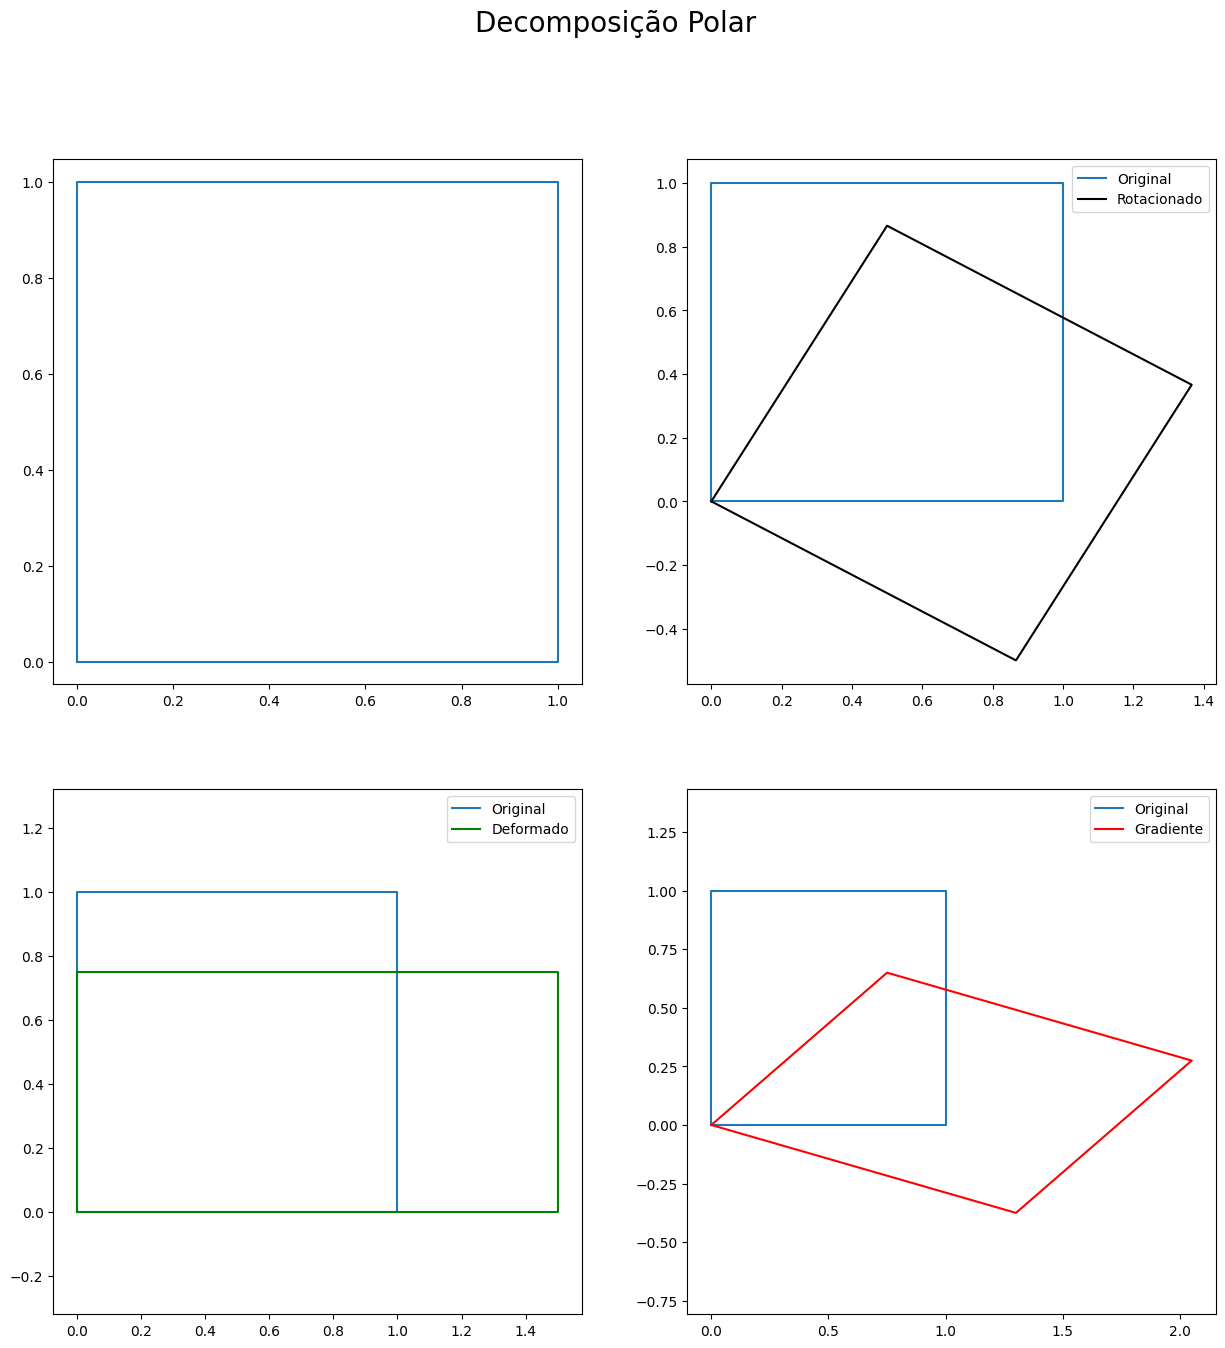

In [2]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(2,2,figsize=(15,15))
#plt.figure()
plt.suptitle('Decomposição Polar',fontsize=20)
ax[0,0].plot(xs,ys)

ax[0,1].plot(xs,ys, label='Original')
ax[0,1].plot(xrot,yrot,'k',label='Rotacionado')
ax[0,1].legend(loc=1)

ax[1,0].plot(xs,ys, label='Original')
ax[1,0].plot(xdef, ydef, 'g', label='Deformado')
ax[1,0].legend(loc=1)

ax[1,1].plot(xs,ys, label='Original')
#ax[1,1].plot(xdef, ydef, 'g')
ax[1,1].plot(xru,yru,'r', label ='Gradiente' )
ax[1,1].legend(loc=1)

ax[0,0].axis('equal')
ax[1,0].axis('equal')
ax[1,1].axis('equal')
plt.show()